# PCA reconstruction

[Principal component analysis for hyperspectral image classification.](https://engineering.purdue.edu/~jshan/publications/2002/SaLIS_2002_HyperImagesPCA.pdf)

In [1]:
import os
import cv2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
images = []
# all files in data directory
files = [f for f in os.listdir('./data') if os.path.isfile(f'./data/{f}')]

# read images as grayscale images
for file in files:
    images.append(cv2.imread(f'./data/{file}', cv2.IMREAD_GRAYSCALE))

In [3]:
# print all images to check
for i in range(len(images)):
    print(f"image {i+1}")
    print(images[i])
    print(images[i].shape)

image 1
[[0 0 0 ... 2 1 1]
 [0 0 0 ... 3 2 2]
 [0 0 0 ... 3 2 1]
 ...
 [0 0 0 ... 4 4 4]
 [0 7 7 ... 4 3 4]
 [0 0 0 ... 5 5 5]]
(512, 512)
image 2
[[0 0 7 ... 2 1 1]
 [0 0 0 ... 3 2 1]
 [0 0 0 ... 3 2 1]
 ...
 [0 0 0 ... 4 5 4]
 [0 0 0 ... 4 4 4]
 [7 0 0 ... 9 8 8]]
(512, 512)
image 3
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 3 2 2]
 ...
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 3 3 3]
 [0 0 0 ... 4 3 4]]
(512, 512)
image 4
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 2 1 2]
 [7 0 7 ... 3 2 1]
 ...
 [0 0 7 ... 4 4 4]
 [0 7 7 ... 4 4 3]
 [7 0 0 ... 4 4 4]]
(512, 512)


In [4]:
# all images are 512*512 shape. so save it
shape = images[i].shape

In [5]:
# now make them as numpy array
image_array = np.array([image.flatten() for image in images])
print(image_array)
print(image_array.shape)

[[0 0 0 ... 5 5 5]
 [0 0 7 ... 9 8 8]
 [0 0 0 ... 4 3 4]
 [0 0 0 ... 4 4 4]]
(4, 262144)


In [6]:
# calculate covariance array
cov = np.cov(image_array)
print(cov)
print(cov.shape)

[[2975.61374192 2794.70768802  712.80513585 2465.60065151]
 [2794.70768802 2774.48299947  521.18389771 2246.55259614]
 [ 712.80513585  521.18389771 3167.56923523  970.14300057]
 [2465.60065151 2246.55259614  970.14300057 2131.33181198]]
(4, 4)


In [7]:
# calculate eigen vectors and values
w, v = np.linalg.eig(cov)

print("eigen values")
print(w, w.shape)

print("eigen vectors")
print(v, v.shape)

eigen values
[8001.55989133 2897.96708122    8.72985047  140.74096559] (4,)
eigen vectors
[[ 0.599236    0.17612161  0.7453878   0.23301164]
 [ 0.56430167  0.22572179 -0.27399142 -0.7453469 ]
 [ 0.25139408 -0.95801285  0.06265557 -0.12282786]
 [ 0.50919628  0.01556407 -0.60448326  0.61243522]] (4, 4)


In [8]:
# argsort of eigen values
eig_order = np.argsort(w)[::-1][:w.shape[0]]
print("argsort of eig")

print(eig_order)
print(eig_order.shape)

argsort of eig
[0 1 3 2]
(4,)


In [9]:
# check cov == ADA^T
D = np.identity(w.shape[0]) * w
np.matmul(np.matmul(v, D), np.transpose(v))

array([[2975.61374192, 2794.70768802,  712.80513585, 2465.60065151],
       [2794.70768802, 2774.48299947,  521.18389771, 2246.55259614],
       [ 712.80513585,  521.18389771, 3167.56923523,  970.14300057],
       [2465.60065151, 2246.55259614,  970.14300057, 2131.33181198]])

In [10]:
# permutation matrix to change row of eig vector matrix
eig_permutation = np.zeros(v.shape)
eig_permutation[np.arange(0,v.shape[0]),eig_order] = 1
print(eig_permutation)

changed_v = np.matmul(eig_permutation, v)
print(changed_v)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[ 0.599236    0.17612161  0.7453878   0.23301164]
 [ 0.56430167  0.22572179 -0.27399142 -0.7453469 ]
 [ 0.50919628  0.01556407 -0.60448326  0.61243522]
 [ 0.25139408 -0.95801285  0.06265557 -0.12282786]]


In [11]:
# calculate results of reconstruction
results = np.matmul(changed_v, image_array)

print(results)
print(results.shape)

[[ 0.          0.          1.23285124 ...  8.49487221  7.57336281
   8.31875061]
 [ 0.          0.          1.58005255 ...  0.77565123  0.82392086
   0.54992943]
 [ 0.          0.          0.10894852 ...  2.71786589  3.30678507
   2.70230181]
 [ 0.          0.         -6.70608992 ... -7.60583436 -6.71047708
  -6.64782151]]
(4, 262144)


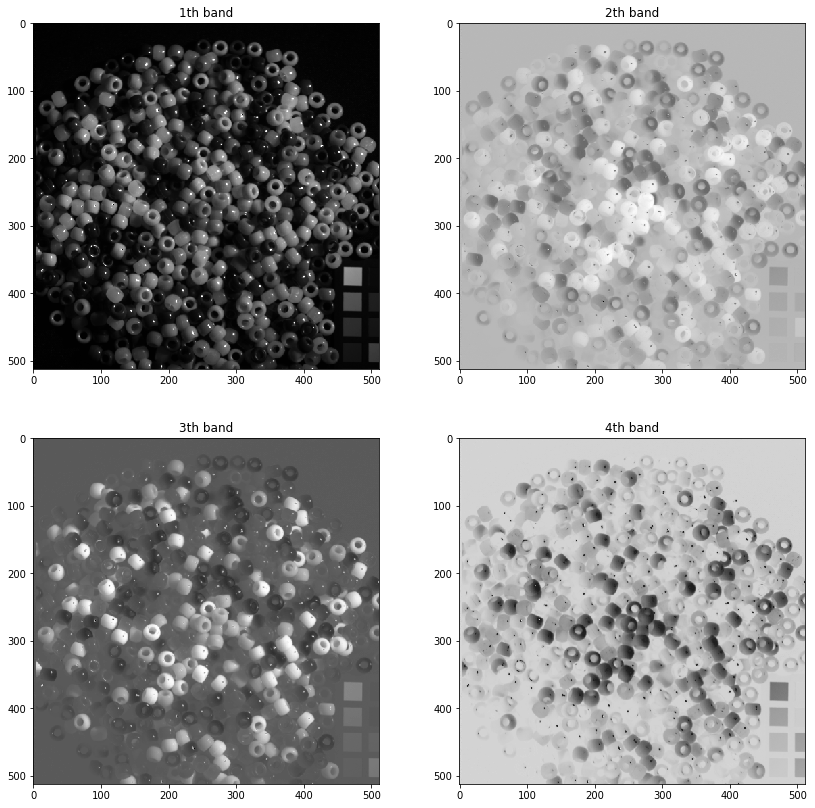

In [12]:
# plotting results
plt.figure(figsize=(14,14))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    ax.set_title(f"{i+1}th band")
    ax.imshow(np.reshape(results[i], shape), cmap='gray')